# Problem Statement

Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.



Data Dictionary:

    Variable Name	Description
            Carat	 Carat weight of the cubic zirconia.
              Cut	 Describe the cut quality of the cubic zirconia. 
                     Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
            Color 	 Colour of the cubic zirconia.With D being the worst and J the best.
                    Clarity	Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst
                    to Best in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
            Depth	 The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle                      Diameter.
            Table	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
            Price	 the Price of the cubic zirconia.
                X	Length of the cubic zirconia in mm.
                Y	 Width of the cubic zirconia in mm.
                Z	 Height of the cubic zirconia in mm.

In [2]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

### Importing data

In [3]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("C:/Users/212548638/Desktop/GL/Project 4 Pedictive modelling/Project/cubic_zirconia.csv")  

In [4]:
# Check top few records to get a feel of the data structure
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [5]:
df.tail(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26957,26958,2.09,Premium,H,SI2,60.6,59.0,8.27,8.22,5.00,17805
26958,26959,1.37,Premium,E,SI2,61.0,57.0,7.25,7.19,4.40,6751
26959,26960,1.05,Very Good,E,SI2,63.2,59.0,6.43,6.36,4.04,4281
26960,26961,1.10,Very Good,D,SI2,NaN,63.0,6.76,6.69,3.94,4361
26961,26962,0.25,Premium,F,VVS2,62.0,59.0,4.04,3.99,2.49,740
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [6]:
df.shape

(26967, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [8]:
# drop the id column as it is useless for the model
df = df.drop('Unnamed: 0',axis=1)

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [12]:
df.describe(include=['object'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


Variables x, y & z have ‘0’ as minimum values which is not possible as these variables are length, width & height of cubic zirconium. We need to either replace the zeros with some values or we can also drop these rows if numbers of rows are not significant. Let’s find out the rows with x, y, z = 0

In [13]:
# Drop those data with x = 0, y = 0, z = 0 
df[df['x'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [14]:
df[df['y'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [15]:
df[df['z'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [16]:
df.shape

(26967, 10)

from above we can see that only 9 entries out of 26967 (0.12 %) are 0 so we can drop them

In [17]:
# Drop those data with x = 0, y = 0, z = 0 
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(26958, 10)

Performing EDA : We will follow the below mentioned steps to perform EDA

Step 1 :Checking & Removing duplicates, if any

Step 2: Checking a Missing value.

Step 3: Univariate Analysis with Outlier treatment

Step 4: Bivariate Analysis.

### EDA-Step-1: Checking for duplicates

In [18]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 33


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
14389,0.60,Premium,D,SI2,62.0,57.0,5.43,5.35,3.34,1196


Looking at the duplicate rows we can conclude that they are not duplicate at all rows level so we decide not to drop them.

df.drop_duplicates(inplace=True)

In [19]:
df.shape

(26958, 10)

## EDA-Step 2: Checking Missing value.

In [20]:
# Are there any missing values ?
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [21]:
df.shape

(26958, 10)

Observations: 
-	There are 10 variables (1 variable unnamed dropped) and 26967 records.
-	There are 26958 records after dropping some rows for x, y & z.
-	The variables 'carat', 'depth', 'table', 'x', 'y', 'z', are numeric type.
-	The variables 'cut', 'color'and 'clarity' are object type.
-	The variable 'Price' is target variable and others are predictor variables
-	Depth has total of 697 missing values
-	There are 34 duplicate rows but looking at the row for every column entry, it is found that all columns are not duplicate. So, dropping duplicate rows is not recommended.


## EDA Step 3 :Univariate Analysis with Outlier treatment

In [22]:
# CHECKING FIVE POINT SUMMARY
# CHECKING DISTRIBUTION OF VARIABLES
# CHECKING OUTLIERS

In [23]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [24]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

Description of carat
----------------------------------------------------------------------------
count    26958.000000
mean         0.798190
std          0.477602
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64 Distribution of carat
----------------------------------------------------------------------------


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


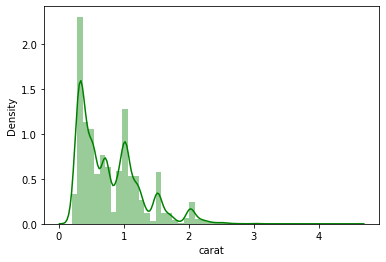

BoxPlot of carat
----------------------------------------------------------------------------


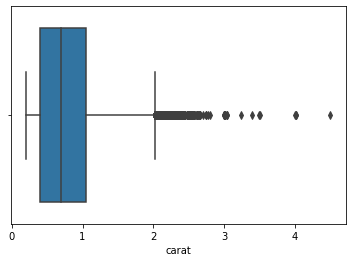

Description of depth
----------------------------------------------------------------------------
count    26261.000000
mean        61.745345
std          1.412395
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64 Distribution of depth
----------------------------------------------------------------------------


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


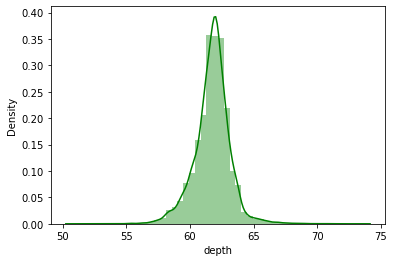

BoxPlot of depth
----------------------------------------------------------------------------


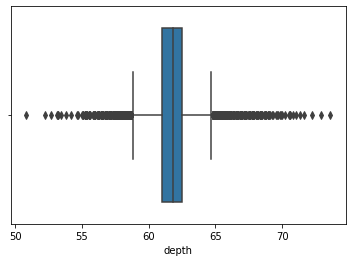

Description of table
----------------------------------------------------------------------------
count    26958.000000
mean        57.455342
std          2.231227
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64 Distribution of table
----------------------------------------------------------------------------


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


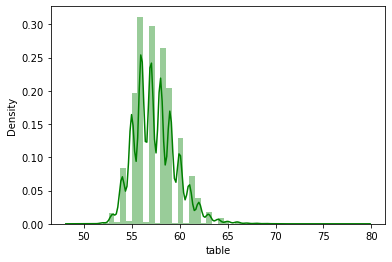

BoxPlot of table
----------------------------------------------------------------------------


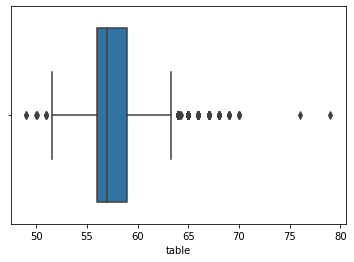

Description of x
----------------------------------------------------------------------------
count    26958.000000
mean         5.730105
std          1.126714
min          3.730000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64 Distribution of x
----------------------------------------------------------------------------


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


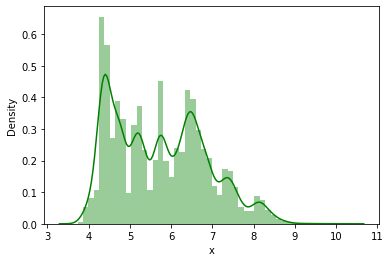

BoxPlot of x
----------------------------------------------------------------------------


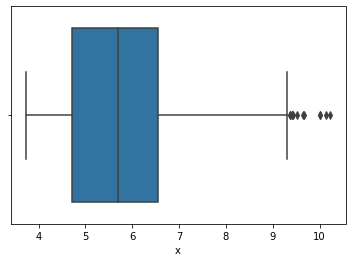

Description of y
----------------------------------------------------------------------------
count    26958.000000
mean         5.733832
std          1.164342
min          3.710000
25%          4.712500
50%          5.700000
75%          6.540000
max         58.900000
Name: y, dtype: float64 Distribution of y
----------------------------------------------------------------------------


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


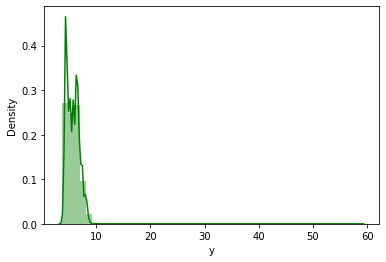

BoxPlot of y
----------------------------------------------------------------------------


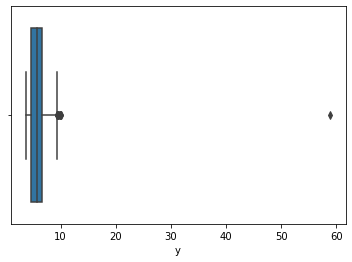

Description of z
----------------------------------------------------------------------------
count    26958.000000
mean         3.539238
std          0.717838
min          1.070000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64 Distribution of z
----------------------------------------------------------------------------


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


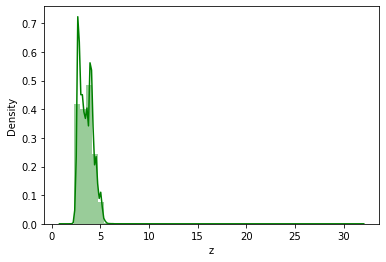

BoxPlot of z
----------------------------------------------------------------------------


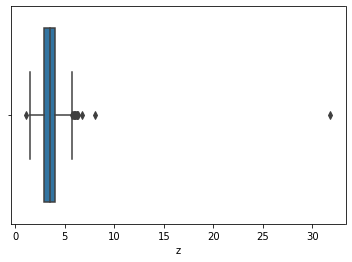

Description of price
----------------------------------------------------------------------------
count    26958.000000
mean      3938.311262
std       4023.359737
min        326.000000
25%        945.000000
50%       2375.000000
75%       5358.000000
max      18818.000000
Name: price, dtype: float64 Distribution of price
----------------------------------------------------------------------------


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


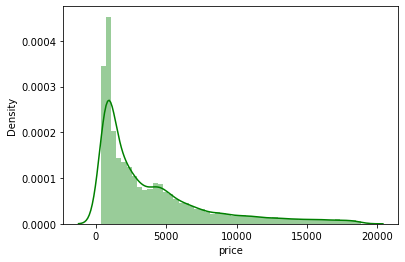

BoxPlot of price
----------------------------------------------------------------------------


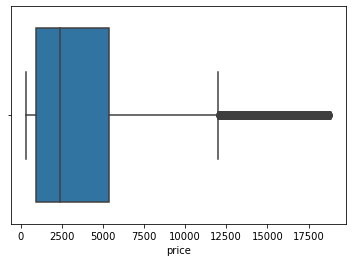

In [25]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [26]:
df.skew()

C:\Users\212548~1\AppData\Local\Temp/ipykernel_18876/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


carat    1.116530
depth   -0.027571
table    0.764957
x        0.402531
y        3.879939
z        2.634182
price    1.618432
dtype: float64

Observations:

-	All the variables except depth (left skewed) are not normally distributed and right skewed.
-	Outliers are present in all the numerical/continuous variables. There is significant amount of outlier present in some variable, the features with datapoint that are far from the rest of dataset which will affect the outcome of our regression model. So, we have treat the outlier. 
-	Looking at the modes in distributed, there could be some clusters present in the variables.


## Removing Outliers

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [28]:
cols  = ['carat','depth', 'table', 'x', 'y', 'z', 'price']
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


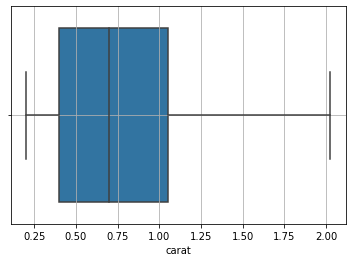

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


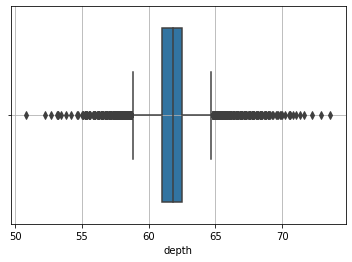

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


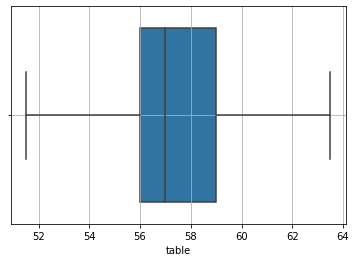

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


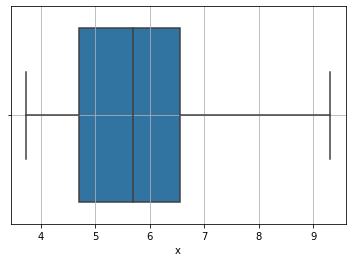

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


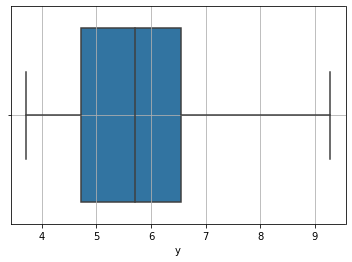

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


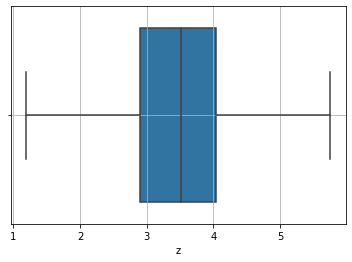

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


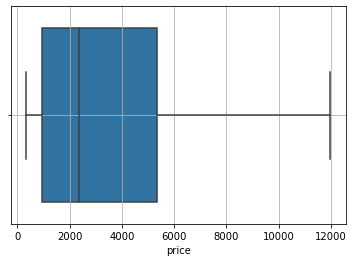

In [29]:
cols  = ['carat','depth', 'table', 'x', 'y', 'z', 'price']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.show();


Except depth outliers have been treated


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


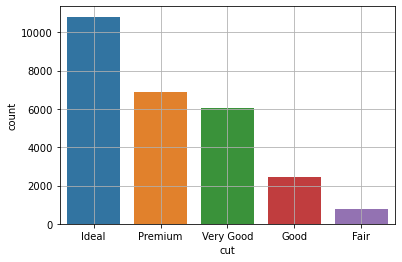

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


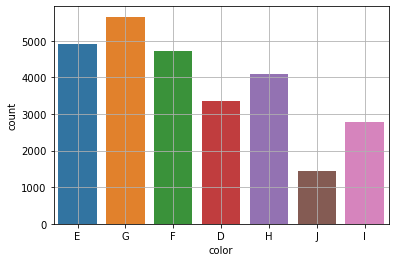

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


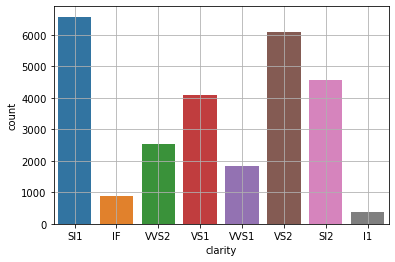

In [30]:
count = ['cut','color','clarity']
for i in count:
    sns.countplot(df[i])
    plt.grid()
    plt.show();

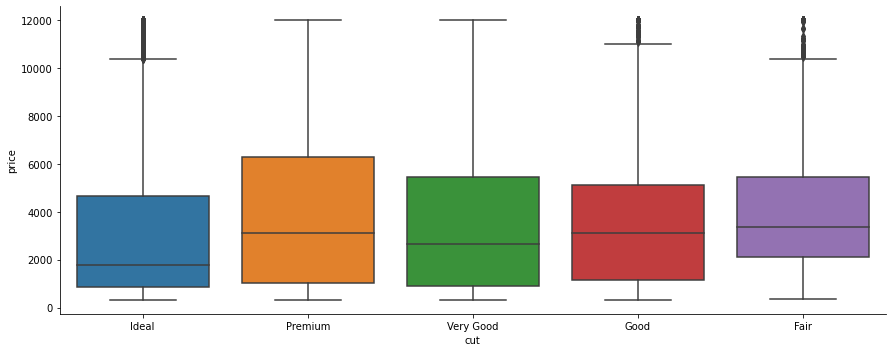

In [31]:
sns.catplot(x='cut', y='price', kind='box', data=df, aspect=2.5)

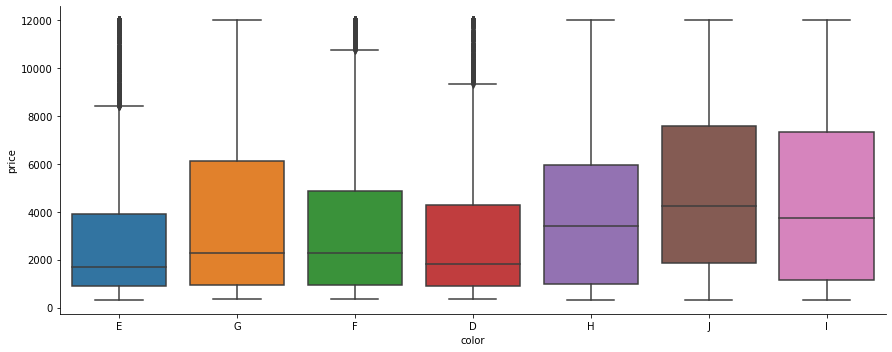

In [32]:
sns.catplot(x='color', y='price', kind='box', data=df, aspect=2.5)

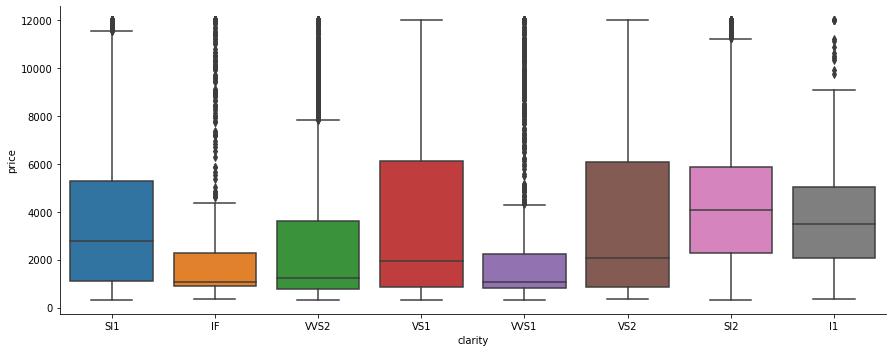

In [33]:
sns.catplot(x='clarity', y='price', kind='box', data=df, aspect=2.5)

- Maximum no of zirconium is of Ideal cut while zirconium with fair cut is least.

- Maximum no of zirconium is of G color while zirconium with J color is least.

- Maximum no of zirconium is of SI1 clarity while zirconium with I1 clarity is least.

## EDA Step 4: Multivariate  Analysis

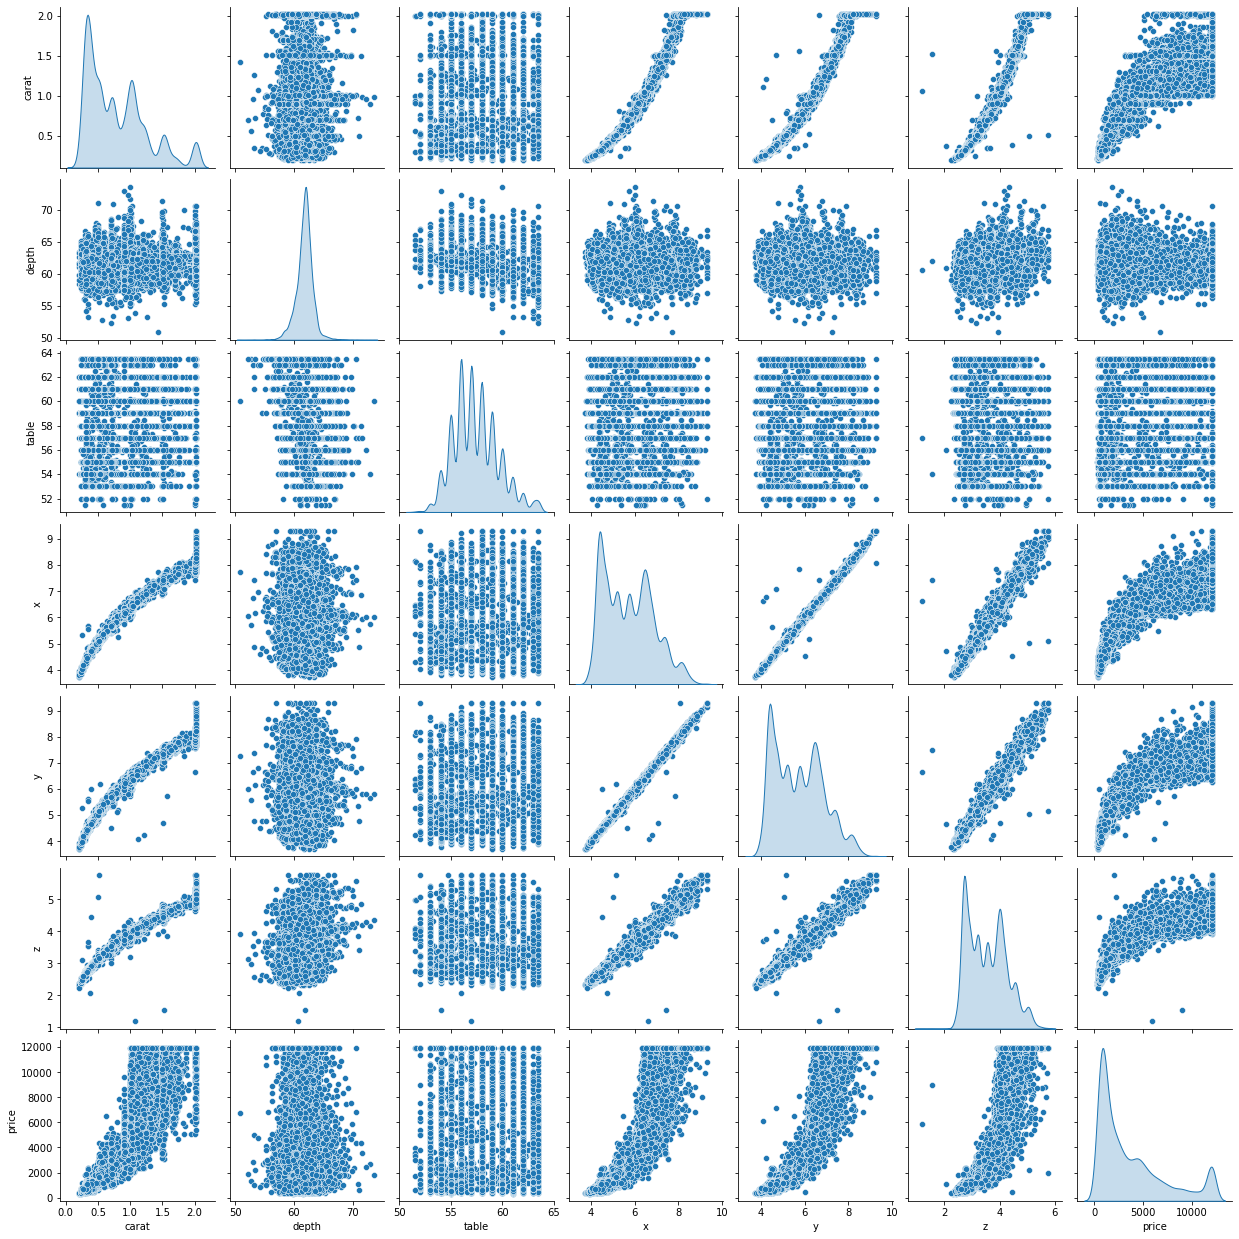

In [34]:
cols  = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
df_attr = (df[cols])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

### Correlation Plot

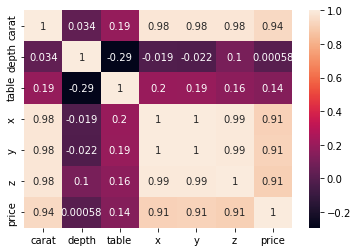

In [35]:
sns.heatmap(df[cols].corr(),annot=True)
plt.show()

In [36]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = df.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

correlation
y     x         0.998492
z     x         0.990898
      y         0.990535
x     carat     0.982882
carat y         0.981964
      z         0.980877
price carat     0.936743
      y         0.914793
x     price     0.913356
price z         0.908588
table depth     0.294291
      x         0.199932
      y         0.194311
carat table     0.187400
table z         0.160748
price table     0.138027
z     depth     0.101463
depth carat     0.033644
      y         0.022265
      x         0.018593
price depth     0.000585

Observation

-	Depth have almost zero correlation with price, so it is a weak predictor.
-	Table is also a weak predictor, but we will check the coefficient and p value in further sections.
-	There is strong correlation between independent variables x, y,  z, & carat which means presence of multicollinearity.
-	There is strong correlation between price and predictors carat, x, y & z hence they are good predictor
-	Independent variables table &, x, y , z, carat have weak correlation between each other which is good for model.
-	Independent variables depth &, x, y , z, carat have weak correlation between each other which is good for model.

1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

### Imputing missing values

As we have seen that only depth has missing values which is a continuous variable. We also found outliers in depth so we will computer the missing values with median.

In [37]:
df.median()

C:\Users\212548~1\AppData\Local\Temp/ipykernel_18876/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2375.00
dtype: float64

In [38]:
df['depth'] = df['depth'].fillna(61.80)    
df.isnull().sum()   

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [39]:
df.shape

(26958, 10)

In Qs.1.1 we have alrady check for 'Zero' value. and we can observe there are some amount of 'Zero' value present on the data set on variable 'x', 'y','z'.This indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible. So we have filter out those as it clearly faulty data entries.We have imputed them.


### unique values for categorical variables

In [40]:
df["cut"].value_counts()

Ideal        10816
Premium       6893
Very Good     6030
Good          2439
Fair           780
Name: cut, dtype: int64

In [41]:
df["clarity"].value_counts()


SI1     6570
VS2     6098
SI2     4571
VS1     4092
VVS2    2531
VVS1    1839
IF       894
I1       363
Name: clarity, dtype: int64

In [42]:
df["color"].value_counts()

G    5658
E    4917
F    4727
H    4098
D    3344
I    2771
J    1443
Name: color, dtype: int64

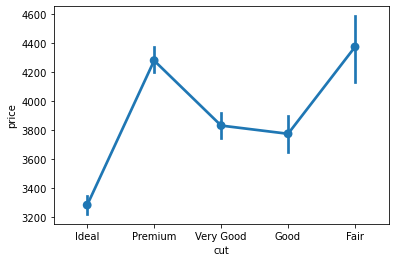

In [43]:
sns.pointplot(x="cut", y="price", data=df);

<AxesSubplot:xlabel='clarity', ylabel='price'>

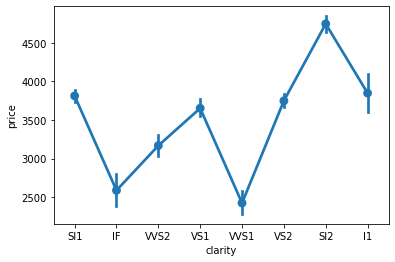

In [44]:
sns.pointplot(x="clarity", y="price", data=df)
# IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1 :  order : worst to best

<AxesSubplot:xlabel='color', ylabel='price'>

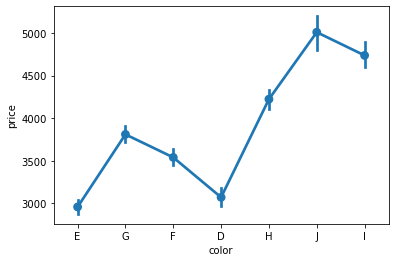

In [45]:
sns.pointplot(x="color", y="price", data=df)
# D,E,F,G,H,I,J :  order : worst to best

1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

As we have seen that cut, clarity and color are object, so we must convert them into categorical. As these are ordinal values, we encode the variables in a way that will highlight the rank order that is mentioned in the problem statement.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  object 
 2   color    26958 non-null  object 
 3   clarity  26958 non-null  object 
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   x        26958 non-null  float64
 7   y        26958 non-null  float64
 8   z        26958 non-null  float64
 9   price    26958 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.3+ MB


### Converting all objects to categorical codes

In [47]:
## We are coding up the 'categorical variable in an ordinal manner

df['cut']=np.where(df['cut'] =='Fair', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', '3',df['cut'])
df['cut']=np.where(df['cut'] =='Premium', '4',df['cut'])
df['cut']=np.where(df['cut'] =='Ideal', '5',df['cut'])

df['cut']=np.where(df['cut'] =='Fair', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', '2',df['cut'])
df['cut']=np.where(df['cut'] =='Premium', '3',df['cut'])
df['cut']=np.where(df['cut'] =='Ideal', '4',df['cut'])

df['cut']=np.where(df['cut'] =='Ideal', '4', df['cut'])
df['cut']=np.where(df['cut'] =='Premium', '3', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Fair', '0', df['cut'])

In [48]:
df['cut']=np.where(df['cut'] =='Ideal', '3', df['cut'])
df['cut']=np.where(df['cut'] =='Premium', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Fair', '0', df['cut'])

df['color']=np.where(df['color'] =='D', '1', df['color'])
df['color']=np.where(df['color'] =='E', '2', df['color'])
df['color']=np.where(df['color'] =='F', '3', df['color'])
df['color']=np.where(df['color'] =='G', '4', df['color'])
df['color']=np.where(df['color'] =='H', '5', df['color'])
df['color']=np.where(df['color'] =='I', '6', df['color'])
df['color']=np.where(df['color'] =='J', '7', df['color'])

df['color']=np.where(df['color'] =='D', '1', df['color'])
df['color']=np.where(df['color'] =='E', '1', df['color'])
df['color']=np.where(df['color'] =='F', '2', df['color'])
df['color']=np.where(df['color'] =='G', '2', df['color'])
df['color']=np.where(df['color'] =='H', '3', df['color'])
df['color']=np.where(df['color'] =='I', '4', df['color'])
df['color']=np.where(df['color'] =='J', '4', df['color'])


df['color']=np.where(df['color'] =='D', '6', df['color'])
df['color']=np.where(df['color'] =='E', '5', df['color'])
df['color']=np.where(df['color'] =='F', '4', df['color'])
df['color']=np.where(df['color'] =='G', '3', df['color'])
df['color']=np.where(df['color'] =='H', '2', df['color'])
df['color']=np.where(df['color'] =='I', '1', df['color'])
df['color']=np.where(df['color'] =='J', '0', df['color'])



In [49]:

df['color']=np.where(df['color'] =='D', '3', df['color'])
df['color']=np.where(df['color'] =='E', '3', df['color'])
df['color']=np.where(df['color'] =='F', '2', df['color'])
df['color']=np.where(df['color'] =='G', '2', df['color'])
df['color']=np.where(df['color'] =='H', '1', df['color'])
df['color']=np.where(df['color'] =='I', '0', df['color'])
df['color']=np.where(df['color'] =='J', '0', df['color'])


df['clarity']=np.where(df['clarity'] =='IF', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', '5', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI1', '6', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', '7', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '8', df['clarity'])

df['clarity']=np.where(df['clarity'] =='IF', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI1', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '5', df['clarity'])

df['clarity']=np.where(df['clarity'] =='IF', '7', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', '6', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', '5', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI1', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '0', df['clarity'])

In [50]:
df['clarity']=np.where(df['clarity'] =='IF', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI1', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '0', df['clarity'])

In [51]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,3,3,2,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,2,2,4,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2,3,3,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,3,2,2,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,3,2,4,60.4,59.0,4.35,4.43,2.65,779.0


In [52]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  4
0      780
1     2439
3    10816
2    12923
Name: cut, dtype: int64


COLOR :  4
1     4098
0     4214
3     8261
2    10385
Name: color, dtype: int64


CLARITY :  5
0      363
3     2531
4     2733
1     4571
2    16760
Name: clarity, dtype: int64




In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  object 
 2   color    26958 non-null  object 
 3   clarity  26958 non-null  object 
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   x        26958 non-null  float64
 7   y        26958 non-null  float64
 8   z        26958 non-null  float64
 9   price    26958 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.3+ MB


In [54]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,3,3,2,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,2,2,4,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2,3,3,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,3,2,2,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,3,2,4,60.4,59.0,4.35,4.43,2.65,779.0


In [55]:
df.describe()

,carat,depth,table,x,y,z,price
count,26958.000000,26958.000000,26958.000000,26958.000000,26958.00000,26958.000000,26958.000000
mean,0.793418,61.746758,57.435084,5.729937,5.73184,3.538045,3736.761258
std,0.462311,1.394043,2.156693,1.126134,1.11809,0.696074,3469.518163
min,0.200000,50.800000,51.500000,3.730000,3.71000,1.190000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.71250,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.70000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.54000,4.040000,5358.000000
max,2.025000,73.600000,63.500000,9.310000,9.28125,5.750000,11977.500000


In [56]:
## Converting the cut, color & clarity variable to numeric

df['cut'] = df['cut'].astype('int64')
df['color'] = df['color'].astype('int64')
df['clarity'] = df['clarity'].astype('int64')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  int64  
 2   color    26958 non-null  int64  
 3   clarity  26958 non-null  int64  
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   x        26958 non-null  float64
 7   y        26958 non-null  float64
 8   z        26958 non-null  float64
 9   price    26958 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 3.3 MB


### Train-Test Split

In [58]:
# Copy all the predictor variables into X dataframe

X = df.drop('price', axis=1)

# Copy target into the y dataframe. 

y = df[['price']]

In [59]:
# Copy all the predictor variables into X dataframe
#X = df.drop({'price','depth'}, axis=1)

# Copy target into the y dataframe. 
#y = df[['price']]

In [60]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,3,3,2,62.1,58.0,4.27,4.29,2.66
1,0.33,2,2,4,60.8,58.0,4.42,4.46,2.70
2,0.90,2,3,3,62.2,60.0,6.04,6.12,3.78
3,0.42,3,2,2,61.6,56.0,4.82,4.80,2.96
4,0.31,3,2,4,60.4,59.0,4.35,4.43,2.65


In [61]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [62]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Obs',18870+8088)

X_train (18870, 9)
X_test (8088, 9)
y_train (18870, 1)
y_test (8088, 1)
Total Obs 26958


### Linear Regression Model using scikit learn

In [63]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [64]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 9116.76188303201
The coefficient for cut is 168.85031927677127
The coefficient for color is 430.65947159563933
The coefficient for clarity is 755.8531686184117
The coefficient for depth is -1.0837125878658247
The coefficient for table is -20.73534747619374
The coefficient for x is -1013.6570242786354
The coefficient for y is 1056.0377146915669
The coefficient for z is -893.4699106842887


Y=mx +c (m= m1,m2,m3...m9) here 9 diferent co-efficients will learn aling with the intercept which is "c" from the model.

From the above coefficients for each of the independent attributes we can conclude

The one unit increase in carat increases price by 9116.76.
The one unit increase in cut increases price by 168.85.
The one unit increase in color increases price by 430.66.
The one unit increase in clarity increases price by 755.85.
The one unit increase in y increases price by 1056.04

The one unit increase in depth decreases price by -1.08,
The one unit increase in table decreases price by -20.73
The one unit increase in x decreases price by -1013.66,
The one unit increase in z decreases price by -893.47.



In [65]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2077.0186706061654


In [66]:
# R square on training data
regression_model.score(X_train, y_train)

0.9275605988850442

92.7% of the variation in the price is explained by the predictors in the model for train set

In [67]:
# R square on testing data
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS
regression_model.score(X_test, y_test)

0.9225449139305559

92.2% of the variation in the price is explained by the predictors in the model for test set

In [68]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

929.9311746321381

In [69]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

974.7665420050732

Text(0, 0.5, 'y_pred')

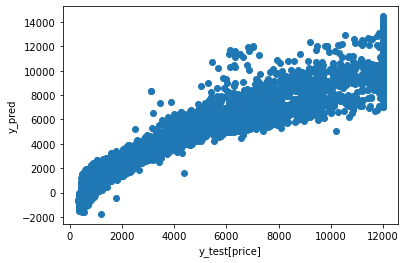

In [70]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred)
plt.xlabel("y_test[price]")
plt.ylabel("y_pred")

we can see that the is a linear plot, very strong corelation between the predicted y and actual y. But there are lots of spread. That indicated some kind noise present on the data set i.e Unexplained variances on the output.

R-square is the percentage of the response variable variation that is explained by a linear model.

R-square = Explained variation / Total variation

R-squared is always between 0 and 100%: 0% indicates that the model explains none of the variability of the response data around its mean.100% indicates that the model explains all the variability of the response data around its mean. In this regression model we can see the R-square value on Training and Test data respectively 0.927 and 0.923.

RMSE on Training data: 929.93
RMSE on Testing data: 974.77
As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

In [71]:
# ------------------------------------------------- ITERATION 2  ---------------------------------------------------

In [72]:
# How do we improve the model? the R^2 is .93, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 

The independent attributes have different units and scales of measurement 
It is always a good practice to scale all the dimensions using z scores or some other method to address the problem of different scales

Scaling or standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bias.

For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem.

In this data set we can see the all the variable are in different scale i.e., prices are in 1000s unit and depth and table are in 100s unit, and carat is in 10s. So, it’s necessary to scale or standardize the data to allow each variable to be compared on a common scale. With data measured in different "units" or on different scales (as here with different means and variances) this is an important data processing step if the results are to be meaningful or not dominated by the variables that have large variances.





But is scaling necessary in this case?

No, it is not necessary, we'll get an equivalent solution whether we apply linear scaling or not. But recommended for regression techniques as well because it would help gradient descent to converge fast and reach the global minima. When number of features becomes large, it helps is running model quickly else the starting point would be very far from minima, if the scaling is not done in preprocessing.

## Applying zscore

In [73]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [74]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [75]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.2130676087280998
The coefficient for cut is 0.03593146787987769
The coefficient for color is 0.12819490444927809
The coefficient for clarity is 0.18433941202235374
The coefficient for depth is -0.0004328008119489717
The coefficient for table is -0.012885380988889755
The coefficient for x is -0.3290473056912069
The coefficient for y is 0.34037981320184413
The coefficient for z is -0.17933779191549232


In [76]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -8.34093657044169e-17


In [77]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_train_scaled, y_train_scaled)

0.9275605988850442

In [78]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9226391269334447


Now we can observe by applying z score the intercept became -8.34093657044169e-17
Which is almost zero. Earlier it was -2077.02. The co-efficient has changed, the bias became nearly zero but the overall accuracy still same.


## VIF to check multicolinearity

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [81]:
i=0
for column in X.columns:
    if i < 14:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 122.02802455329707
cut ---> 14.543151811484508
color ---> 4.677205239193653
clarity ---> 8.681296622855571
depth ---> 1282.4795746977334
table ---> 917.9055641527887
x ---> 10414.26841167036
y ---> 9856.462752435658
z ---> 3752.1226365311113


We can observe there are very strong multi collinearity present in the data set. Ideally it should be within 1 to 5.
We are exploring the Linear Regression using stats models as we are interested in some more statistical metrics of the model.


R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no influence on the predicted variable. 
Instead, we use adjusted R^2 which removes the statistical chance that improves R^2
Scikit does not provide a facility for adjusted R^2... so we use stats model, a library that gives results like what you obtain in R language
This library expects the X and Y to be given in one single data frame.



### Linear Regression using statsmodels

In [82]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
7598,0.71,2,2,2,63.3,59.0,5.52,5.61,3.52,2768.0
8882,0.30,2,3,2,62.9,58.0,4.27,4.31,2.70,544.0
22763,0.70,1,1,2,63.9,59.0,5.64,5.60,3.59,2351.0
6643,0.36,3,3,2,60.2,56.0,4.65,4.62,2.79,1080.0
18701,1.66,2,0,2,63.0,57.0,7.45,7.50,4.71,8901.0


In [83]:
data_test.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
26809,1.01,2,1,2,61.9,57.0,6.36,6.41,3.95,4432.0
10087,0.81,3,2,2,61.8,55.0,5.97,6.03,3.71,4270.0
22817,0.41,2,1,4,62.0,56.0,4.77,4.81,2.97,1166.0
21676,0.82,3,2,1,62.3,56.0,5.96,6.02,3.73,2841.0
14846,1.13,3,2,2,62.7,57.0,6.65,6.68,4.18,6525.0


In [84]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [85]:
expr= 'price ~ carat + cut + color + clarity + depth + table + x + y  + z'

In [86]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept   -2077.018671
carat        9116.761883
cut           168.850319
color         430.659472
clarity       755.853169
depth          -1.083713
table         -20.735347
x           -1013.657024
y            1056.037715
z            -893.469911
dtype: float64

In [87]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.683e+04
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:25:43   Log-Likelihood:            -1.5575e+05
No. Observations:               18870   AIC:                         3.115e+05
Df Residuals:                   18860   BIC:                         3.116e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2077.0187    823.753     -2.521      0.0

Hypothesis Testing for Linear Regression
The big question one needs to ask is, are these coefficients really reflecting the relation between the targets variable and the independent variable or are they by statistical chance.
To establish the reliability of the coefficients, we need hypothesis testing
The Null hypothesis (H0) claims there is no relation between price and any of the variables. That means the coefficient is 0 in the universe
Assuming H0 to be true, what is the probability of finding the coefficients found in the sample if the sample is drawn from that universe in which H0 is true
 At 95% confidence level
-  if the p value is < .05, we reject the H0 i.e. probability of finding these coefficients in sample if they are 0 in the universe is very low
- If p value is >=.05, we do not have sufficient evidence in the data to reject the H0 and hence we do notreject H0. We believe H0 is likely to be true in the universe
P is the conditional probability given H0 is true

From statsmodel summary we can see the p value is showing 0.925 for 'depth' variable, which is much higher than 0.05. That means this dimension is useless. So we can say that the attribute which are having p value greater than 0.05 are poor predictor for price 

Overall, model P value is lower than 0.05 which means model is reliable after eliminating the useless attributes that is depth


In [88]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
mse

864771.9895527086

In [89]:
mse1 = np.mean((lm1.predict(data_test.drop('price',axis=1))-data_test['price'])**2)
mse1

950169.811412521

In [90]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

929.9311746321383

In [91]:
math.sqrt(mse1)

974.7665420050696

Text(0, 0.5, 'y_pred')

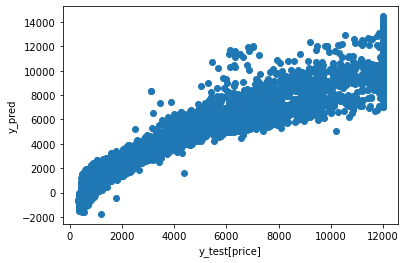

In [92]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500

plt.scatter(y_test['price'], y_pred)
plt.xlabel("y_test[price]")
plt.ylabel("y_pred")


In [93]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-2077.02) * Intercept + (9116.76) * carat + (168.85) * cut + (430.66) * color + (755.85) * clarity + (-1.08) * depth + (-20.74) * table + (-1013.66) * x + (1056.04) * y + (-893.47) * z + 

As per model these five attributes that are most important attributes 'Carat', 'Cut', 'color','clarity' and width i.e 'y' for predicting the price.

1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

The study was performed by Cleaning and preprocessing the data. Then Exploratory Data Analysis (EDA) was performed to get some insight into data. We build a linear regression with  ‘sklearn’ as well as ‘statsmodels. Different techniques like scaling, different combinations of variables encoding techniques were used to check and improve the performance. We checked for multicollinearity with vif and found that multicollinearity is present which is strong. We also checked which variables have no significant correlation with target value and found depth variable to be the one.
Then Evaluate was evaluated by checking the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. We saw that the accuracy, Rsquare, RMSE of model with ‘sklearn’ is same as ‘statsmodels .
Scaling : co-efficient has changed, the bias became nearly zero but the overall accuracy still same

Inference:

The final Linear Regression equation is
price = (-2077.02) * Intercept + (9116.76) * carat + (168.85) * cut + (430.66) * color + (755.85) * clarity + (-1.08) * depth + (-20.74) * table + (-1013.66) * x + (1056.04) * y + (-893.47) * z + 

From the above coefficients for each of the independent attributes we can conclude

The one unit increase in carat increases price by 9116.76.
The one unit increase in cut increases price by 168.85.
The one unit increase in color increases price by 430.66.
The one unit increase in clarity increases price by 755.85.
The one unit increase in y increases price by 1056.04

The one unit increase in depth decreases price by -1.08,
The one unit increase in table decreases price by -20.73
The one unit increase in x decreases price by -1013.66,
The one unit increase in z decreases price by -893.47.

There negative co-efficient values implies that variables inversely proportional with diamond price.

92.7% of the variation in the price is explained by the predictors in the model for train set
92.2% of the variation in the price is explained by the predictors in the model for test set
R-squared:0.933 and Adj. R-squared: 0.933 are same. The overall P value is less than alpha.

As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.
Finally we can conclude that Best 5 attributes that are most important are 'Carat', 'Cut', 'color','clarity' and width i.e 'y' for predicting the price.



Recommendations:
1)	The Gem Stone company should consider the features 'carat', 'cut', 'color’, ‘clarity' and width i.e., 'y' as most important for predicting the price.
2)	As we can see from the model Higher the width('y') of the stone is higher the price. So the stones having higher width('y') should consider in higher profitable stones.
3)	The 'Premium Cut' on Diamonds are the most Expensive, followed by 'Very Good' Cut, these should consider in higher profitable stones.
4)	The Diamonds clarity with 'VS1' &'VS2' are the most Expensive. So, these two categories also consider in higher profitable stones.
5)	As we see for 'x' i.e., Length of the stone, higher the length of the stone is lower the price. The p value is less than 0.05, so can conclude that as higher the length of the stone is a lower profitable stone.
6)	Similarly, for the 'z' variable having negative co-efficient i.e., -905.38. And the p value is less than 0.05, so we can conclude that as higher the 'z' of the stone is a lower profitable stone. 
7)	Also, we can see the 'y' width in mm having positive co-efficient. And the p value is less than 0.05, so we can conclude that higher the width of the stone is a higher profitable stone.




# Problem 2: Logistic Regression and LDA

# Problem Statement

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

## Data Dictionary

    Holiday_Package 	 Opted for Holiday Package yes/no?
                Salary 	 Employee salary
                    age 	 Age in years
                    edu 	 Years of formal education
        no young children 	 The number of young children (younger than 7 years)
        no older children 	 Number of older children
                foreign 	 foreigner Yes/No 

In [94]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [95]:
data=pd.read_csv("C:/Users/212548638/Desktop/GL/Project 4 Pedictive modelling/Project/Holiday_Package.csv")

### EDA

In [96]:
data.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [97]:
data.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [98]:
data.shape

(872, 8)

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [100]:
# drop Unnanmed : 0
data = data.drop('Unnamed: 0', axis = 1)

In [101]:
data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [103]:
# Rename the columns with spelling correction

In [104]:
data.rename(columns={'Holliday_Package':'HolidayPackage','age':'Age','educ':'Educ','no_young_children':'No_young_children','no_older_children':'No_older_children'}, inplace = True)

In [105]:
data.columns

Index(['HolidayPackage', 'Salary', 'Age', 'Educ', 'No_young_children',
       'No_older_children', 'foreign'],
      dtype='object')

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   HolidayPackage     872 non-null    object
 1   Salary             872 non-null    int64 
 2   Age                872 non-null    int64 
 3   Educ               872 non-null    int64 
 4   No_young_children  872 non-null    int64 
 5   No_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


Observation:
-	In the above table we can see that column names have been corrected/Renamed.
-	There are no missing values. 5 variables are numeric and remaining categorical. 
-	Categorical variables are not in encoded format.


In [107]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
Age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
Educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
No_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
No_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [108]:
data.describe(include=['object'])

,HolidayPackage,foreign
count,872,872
unique,2,2
top,no,no
freq,471,656


### EDA-Step-1: Checking for duplicates

In [109]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data.shape)

Number of duplicate rows = 0
(872, 7)


There are no duplicate rows


## EDA-Step 2: Checking Missing value.

In [110]:
# Are there any missing values ?
data.isnull().sum()

HolidayPackage       0
Salary               0
Age                  0
Educ                 0
No_young_children    0
No_older_children    0
foreign              0
dtype: int64

In [111]:
data.shape

(872, 7)

Observation: 
-	There are 7 variables  and 872 records.
-	The variables 'Salary', 'Age', 'Educ', 'No_young_children','No_older_children', are numeric type .
-	The variables 'HolidayPackage'and 'foreign' are object type.
-	The variable 'HolidayPackage' is target variable and others are predictor variables
-	No missing values and duplicate rows found.


## EDA Step 3 :Univariate Analysis with Outlier treatment

In [112]:
# CHECKING FIVE POINT SUMMARY
# CHECKING DISTRIBUTION OF VARIABLES
# CHECKING OUTLIERS

In [113]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(data[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(data[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=data[column])
    plt.show()

In [114]:
df_num = data.select_dtypes(include = ['int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

5

Description of Salary
----------------------------------------------------------------------------
count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64 Distribution of Salary
----------------------------------------------------------------------------


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


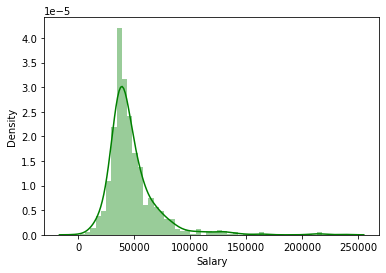

BoxPlot of Salary
----------------------------------------------------------------------------


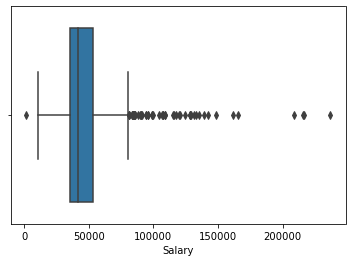

Description of Age
----------------------------------------------------------------------------
count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: Age, dtype: float64 Distribution of Age
----------------------------------------------------------------------------


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


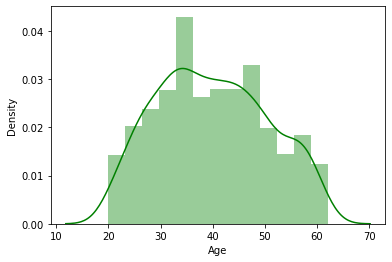

BoxPlot of Age
----------------------------------------------------------------------------


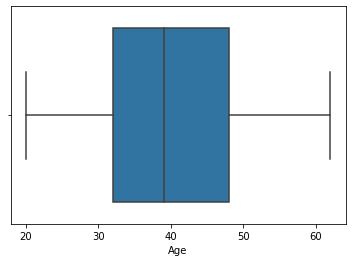

Description of Educ
----------------------------------------------------------------------------
count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: Educ, dtype: float64 Distribution of Educ
----------------------------------------------------------------------------


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


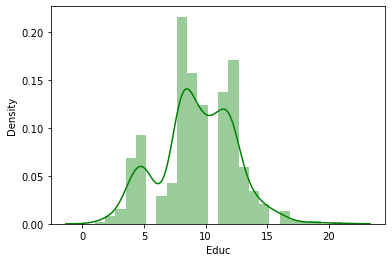

BoxPlot of Educ
----------------------------------------------------------------------------


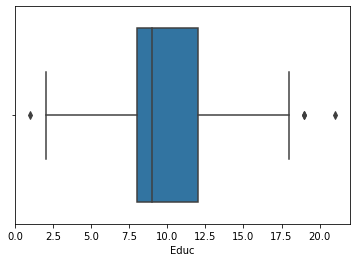

Description of No_young_children
----------------------------------------------------------------------------
count    872.000000
mean       0.311927
std        0.612870
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: No_young_children, dtype: float64 Distribution of No_young_children
----------------------------------------------------------------------------


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


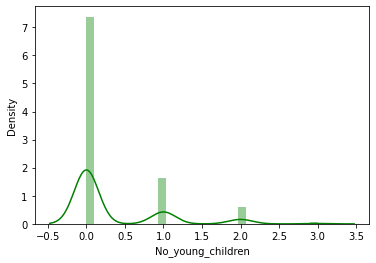

BoxPlot of No_young_children
----------------------------------------------------------------------------


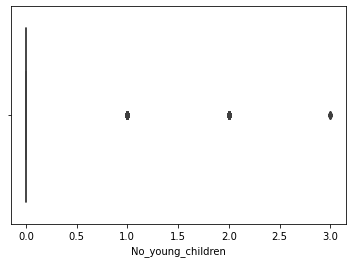

Description of No_older_children
----------------------------------------------------------------------------
count    872.000000
mean       0.982798
std        1.086786
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: No_older_children, dtype: float64 Distribution of No_older_children
----------------------------------------------------------------------------


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


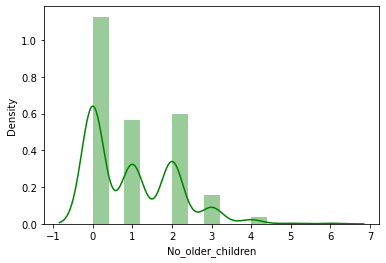

BoxPlot of No_older_children
----------------------------------------------------------------------------


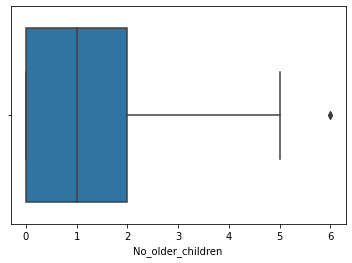

In [115]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [116]:
data.skew()

C:\Users\212548~1\AppData\Local\Temp/ipykernel_18876/1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Salary               3.103216
Age                  0.146412
Educ                -0.045501
No_young_children    1.946515
No_older_children    0.953951
dtype: float64

Observations:

-	All the variables except Educ (left skewed) are right skewed.

-	Outliers are present in salary and education

-	Looking at the modes in distributed, there could be some clusters present in the variables.


## Removing Outliers

In [117]:
# We are only doing outlier treatment for Salary attribute as other columns have very less outliers and that are near lower and upper ranges

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


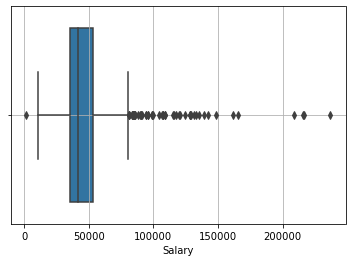

In [118]:
cols = ['Salary']
for i in cols:
    sns.boxplot(data[i], whis = 1.5)
    plt.grid()
    plt.show();

In [119]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [120]:
lr,ur=remove_outlier(data['Salary'])
print('Lower Range :',lr,'\nUpper Range :',ur)
data['Salary']=np.where(data['Salary']>ur,ur,data['Salary'])
data['Salary']=np.where(data['Salary']<lr,lr,data['Salary'])

Lower Range : 8105.75 
Upper Range : 80687.75


C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


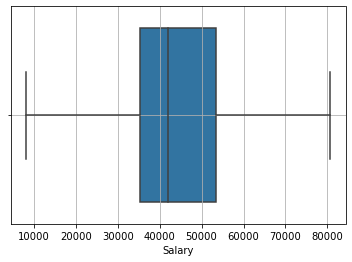

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


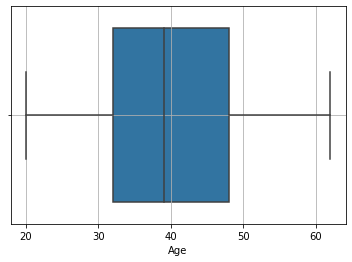

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


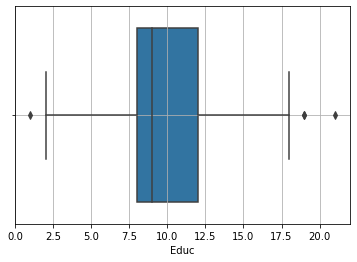

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


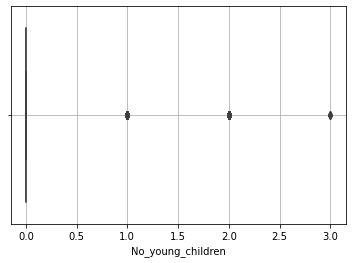

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


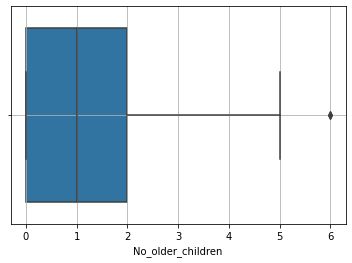

In [121]:
cols  = ['Salary','Age', 'Educ', 'No_young_children', 'No_older_children']
for i in cols:
    sns.boxplot(data[i],whis=1.5)
    plt.grid()
    plt.show();

### Geting unique counts of all Objects

In [122]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print(feature)
        print(data[feature].value_counts())
        print('\n')
        

HolidayPackage
no     471
yes    401
Name: HolidayPackage, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




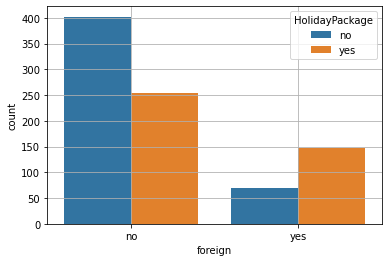

In [123]:
sns.countplot(data=data,hue='HolidayPackage', x='foreign')
plt.grid()
plt.show();

<AxesSubplot:xlabel='No_older_children', ylabel='count'>

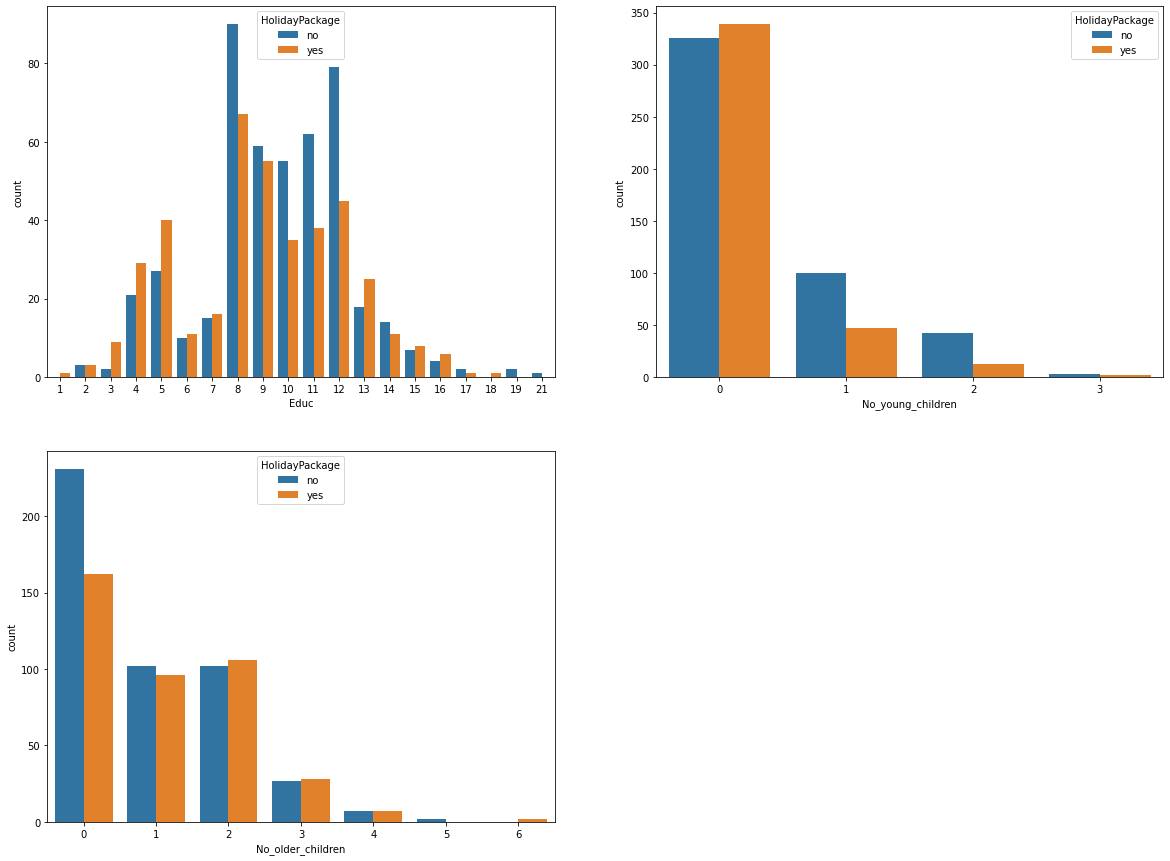

In [124]:
### Count plot
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(data=data,hue='HolidayPackage', x='Educ')
plt.subplot(2,2,2)
sns.countplot(data=data,hue='HolidayPackage', x='No_young_children')
plt.subplot(2,2,3)
sns.countplot(data=data,hue='HolidayPackage', x='No_older_children')

Observations
-	More Employess opt for Tours if their education level is 3,4,5,6,7,13,14,15,16
-	Employees dont opt for tours if they have young child
-	Older children count doesnt appearst to have much impact on tour opted by employees or not
-	Foreigner employees tends to opt more for the tour


### Distribution of the variables Check

In [125]:
from pylab import rcParams

In [126]:
rcParams['figure.figsize'] = 15,8

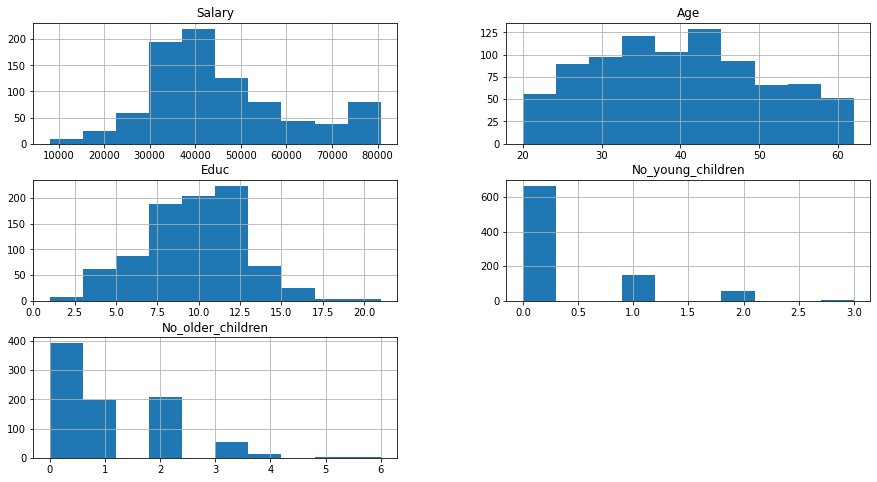

In [127]:
data[['Salary','Age','Educ','No_young_children', 'No_older_children']].hist();

## EDA Step 4: Multivariate  Analysis

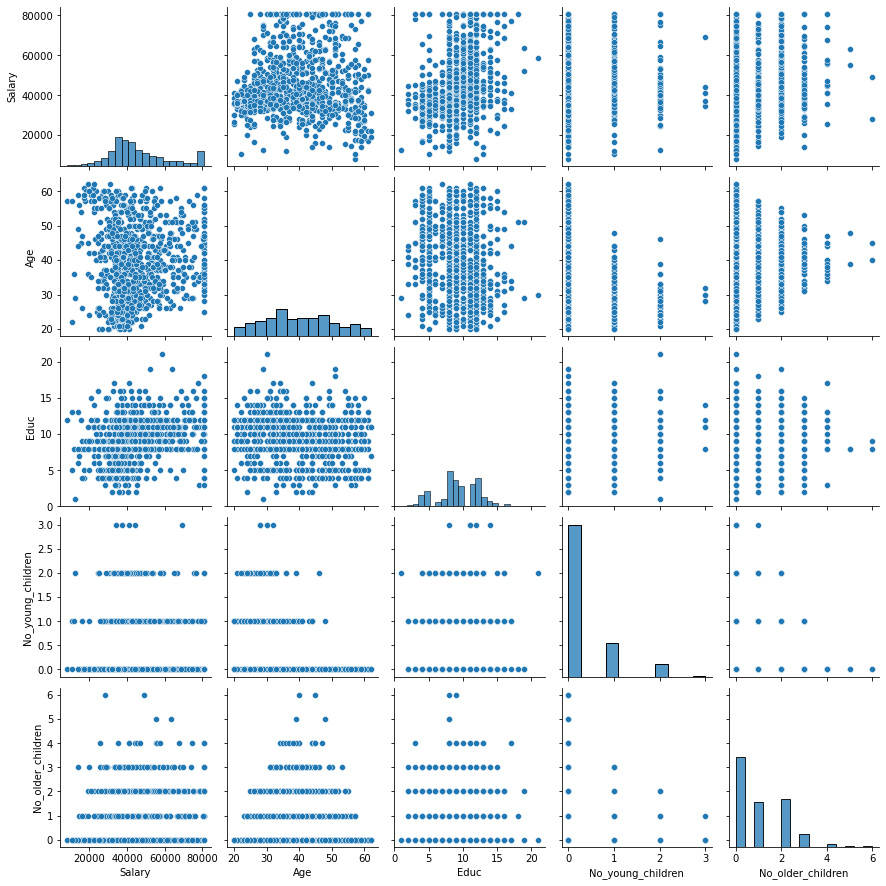

In [128]:
# Pairplot using sns
sns.pairplot(data ,diag_kind='hist');

### Checking for Correlations.

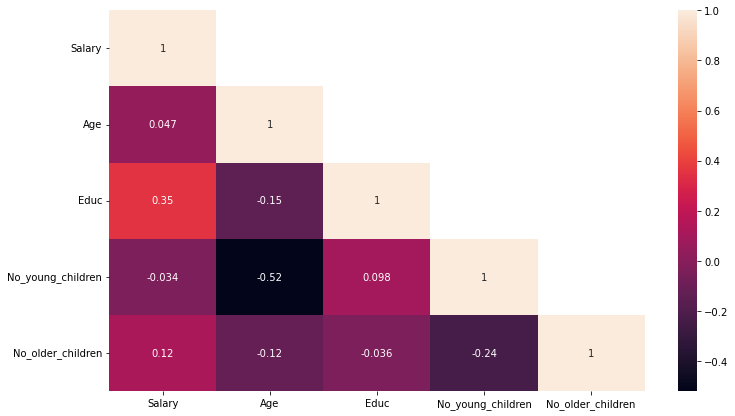

In [129]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True,mask=np.triu(data.corr(),+1));

In [130]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = data.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

,,correlation
No_young_children,Age,0.519093
Educ,Salary,0.352726
No_older_children,No_young_children,0.238428
Age,Educ,0.149294
No_older_children,Salary,0.121993
Age,No_older_children,0.116205
No_young_children,Educ,0.098350
Age,Salary,0.047029
No_older_children,Educ,0.036321
No_young_children,Salary,0.034360


There is some correlation between Age & No_young_children as well as Educ & Salary

data.columns

In [131]:
#data['HolidayPackage']=np.where(data['HolidayPackage'] =='yes', '1', data['HolidayPackage'])
#data['HolidayPackage']=np.where(data['HolidayPackage'] =='no', '0', data['HolidayPackage'])

In [132]:
#data['foreign']=np.where(data['foreign'] =='yes', '1', data['foreign'])
#data['foreign']=np.where(data['foreign'] =='no', '0', data['foreign'])

In [133]:
## Converting the object variable to numeric

#data['HolidayPackage'] = data['HolidayPackage'].astype('int64')
#data['foreign'] = data['foreign'].astype('int64')
#data.info()

### Bi-Variate Analysis with Target variable

<b>Salary and HolidayPackage</b>

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HolidayPackage', ylabel='Salary'>

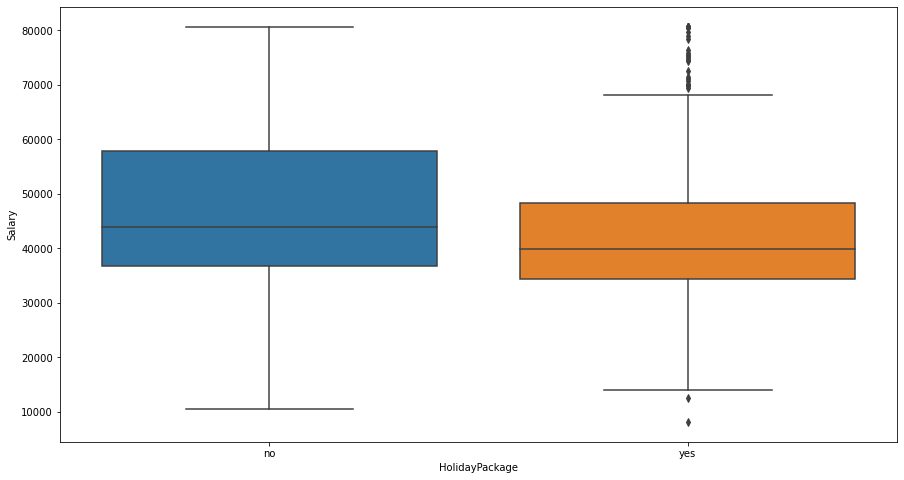

In [134]:
sns.boxplot(data['HolidayPackage'],data['Salary'])

Employees with salary greater than 50000 are less opting for holiday package.

<b>Age  and HolidayPackage</b>

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HolidayPackage', ylabel='Age'>

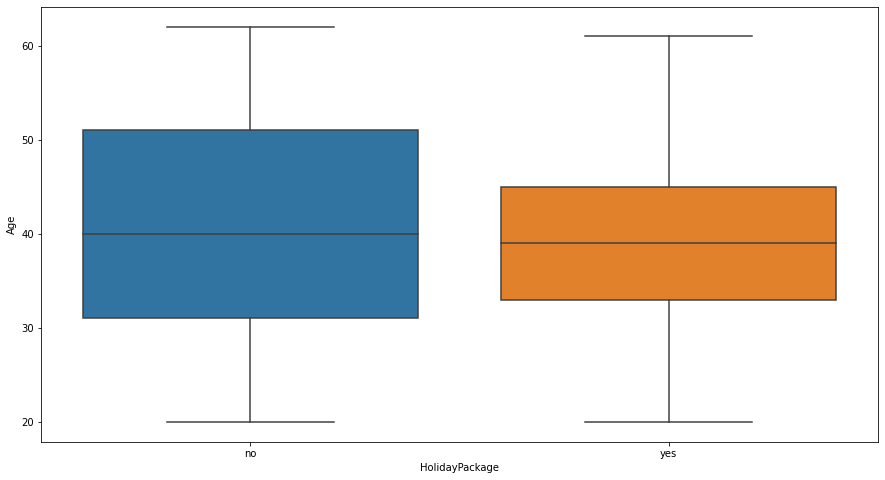

In [135]:
sns.boxplot(data['HolidayPackage'],data['Age'])

Employees with age less than 50 are more opting for holiday package.

<b>Educ  and HolidayPackage</b>

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HolidayPackage', ylabel='Educ'>

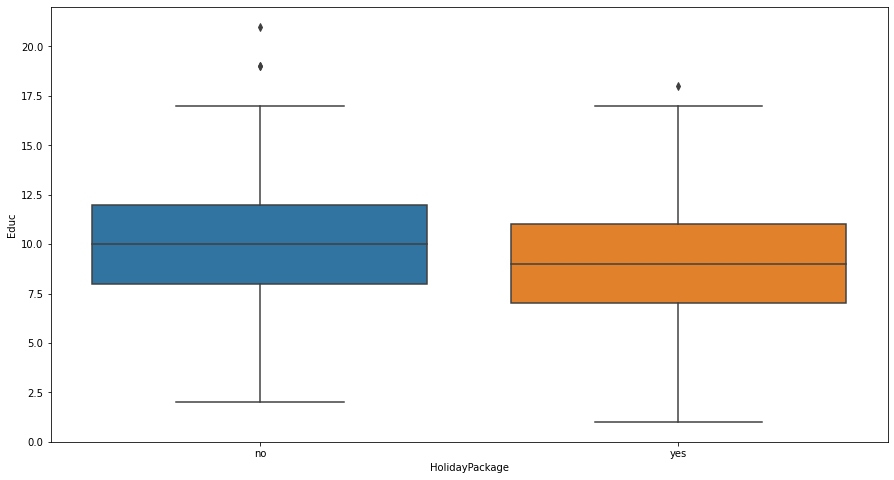

In [136]:
sns.boxplot(data['HolidayPackage'],data['Educ'])

From education point of view, almost same pattern can be seen for yes and no. Employees lies with between 7.5 years to 12.5 year of education

<b>No_young_children  and HolidayPackage</b>

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HolidayPackage', ylabel='No_young_children'>

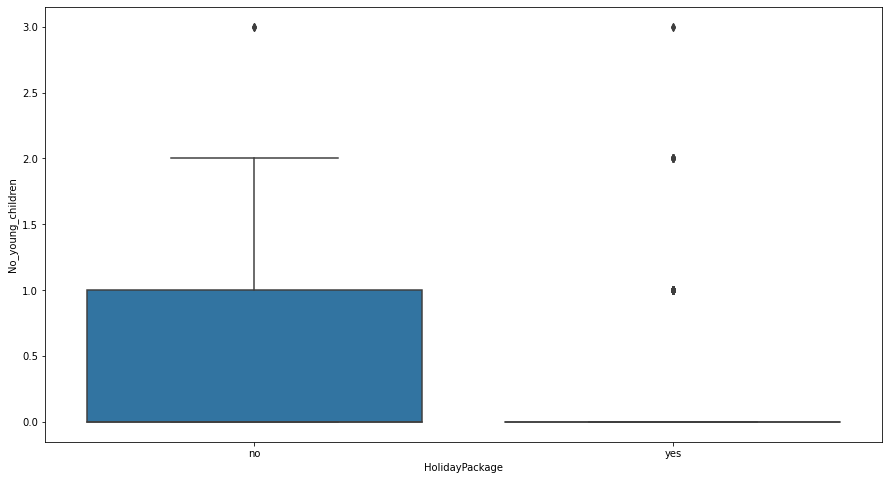

In [137]:
sns.boxplot(data['HolidayPackage'],data['No_young_children'])

<b>No_older_children  and HolidayPackage</b>

C:\Users\212548638\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HolidayPackage', ylabel='No_older_children'>

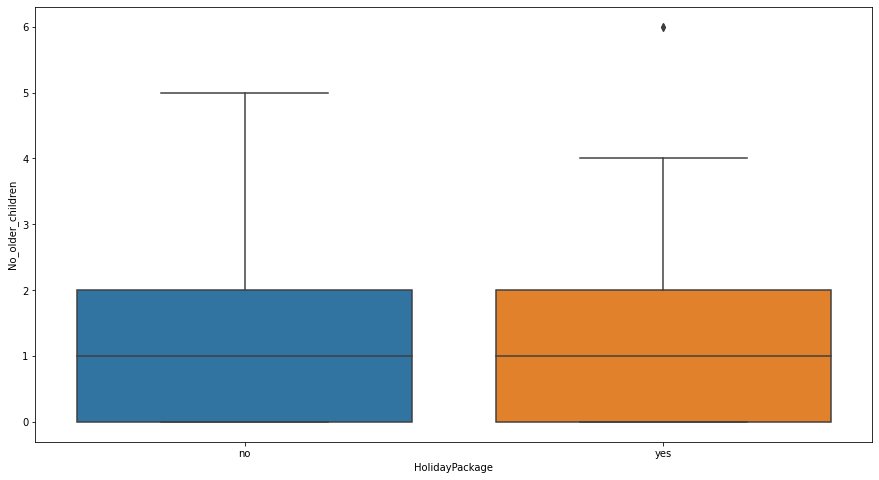

In [138]:
sns.boxplot(data['HolidayPackage'],data['No_older_children'])

### Proportion in the Target classes

In [139]:
data.HolidayPackage.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: HolidayPackage, dtype: float64

45.9% of employees are opting for holiday package.

In [140]:
data.head()

,HolidayPackage,Salary,Age,Educ,No_young_children,No_older_children,foreign
0,no,48412.0,30,8,1,1,no
1,yes,37207.0,45,8,0,1,no
2,no,58022.0,46,9,0,0,no
3,no,66503.0,31,11,2,0,no
4,no,66734.0,44,12,0,2,no


2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

### Converting all objects to categorical codes

In [141]:
## Converting the '.HolidayPackage' & 'foreign' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [142]:
## Applying the created Label Encoder object for the target class
## Assigning the 0 to no and 1 to yes

data['HolidayPackage'] = LE.fit_transform(data['HolidayPackage'])
data.head()

,HolidayPackage,Salary,Age,Educ,No_young_children,No_older_children,foreign
0,0,48412.0,30,8,1,1,no
1,1,37207.0,45,8,0,1,no
2,0,58022.0,46,9,0,0,no
3,0,66503.0,31,11,2,0,no
4,0,66734.0,44,12,0,2,no


In [143]:
## Converting the other 'object' type variables as dummy variables

data = pd.get_dummies(data,drop_first=True)
data.head()

,HolidayPackage,Salary,Age,Educ,No_young_children,No_older_children,foreign_yes
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


In [144]:
data.tail()

,HolidayPackage,Salary,Age,Educ,No_young_children,No_older_children,foreign_yes
867,0,40030.0,24,4,2,1,1
868,1,32137.0,48,8,0,0,1
869,0,25178.0,24,6,2,0,1
870,1,55958.0,41,10,0,1,1
871,0,74659.0,51,10,0,0,1


### Train Test Split

In [145]:
# Copy all the predictor variables into X dataframe
X = data.drop('HolidayPackage', axis=1)

# Copy target into the y dataframe. 
y = data['HolidayPackage']

In [146]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=data['HolidayPackage'])

In [147]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Obs',610+262)

X_train (610, 6)
X_test (262, 6)
y_train (610,)
y_test (262,)
Total Obs 872


In [148]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: HolidayPackage, dtype: float64

In [149]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: HolidayPackage, dtype: float64

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

## Logistic Regression

In [150]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [151]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [152]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.677845,0.322155
1,0.534493,0.465507
2,0.691845,0.308155
3,0.487745,0.512255
4,0.571939,0.428061


## Model Evaluation

In [153]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6672131147540984

### AUC and ROC for the training data

AUC: 0.733


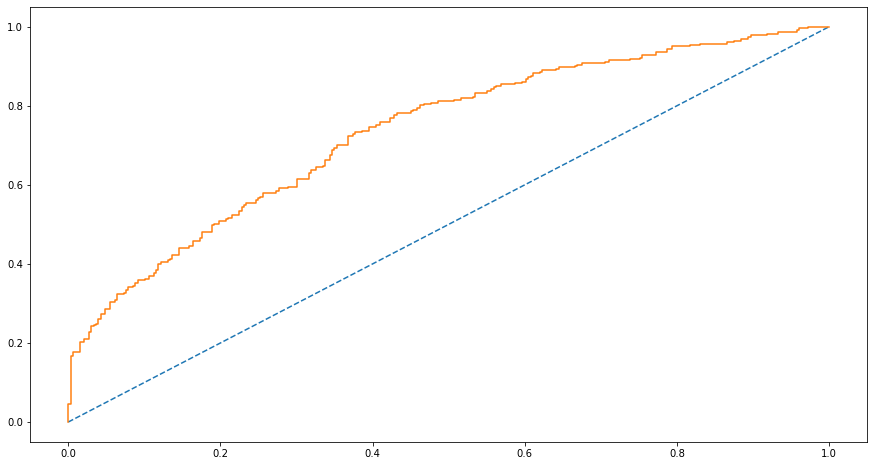

In [154]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [155]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.648854961832061

### AUC and ROC for the test data

AUC: 0.733


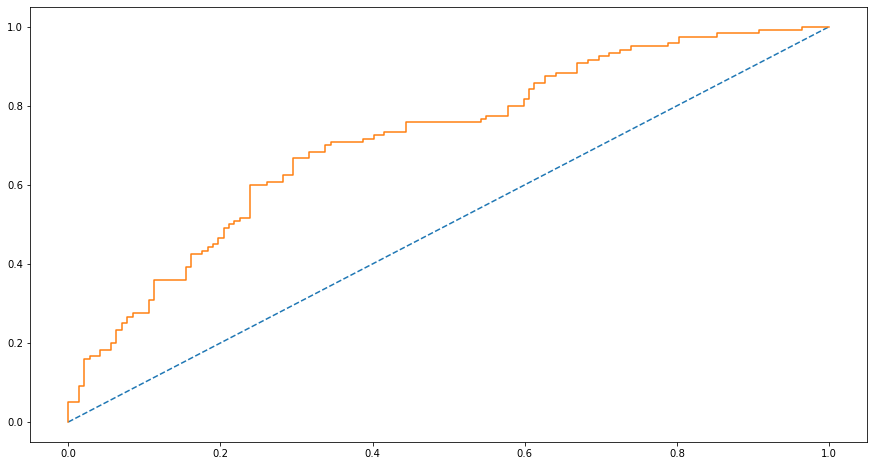

In [156]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [157]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


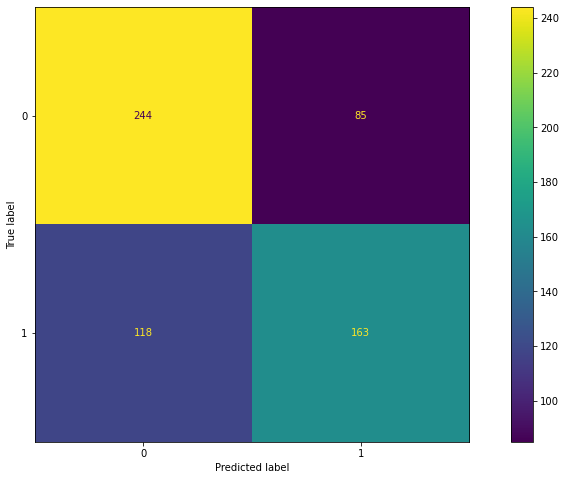

In [158]:
plot_confusion_matrix(model,X_train,y_train);

In [159]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



### Confusion Matrix for test data

In [160]:
confusion_matrix(y_test, ytest_predict)

array([[108,  34],
       [ 58,  62]], dtype=int64)

C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


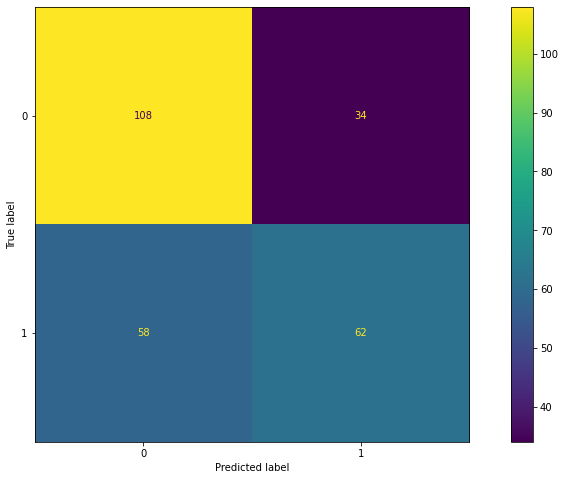

In [161]:
plot_confusion_matrix(model,X_test,y_test);

In [162]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



In [163]:
## Applying GridSearchCV for Logistic Regression

In [164]:
grid={'penalty':['l2','none','11'],
      'solver':['liblinear','lbfgs'],
      'tol':[0.0001,0.00001]}

In [165]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [166]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [167]:
grid_search.fit(X_train, y_train)

C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 78, in _check_solver
    raise Va

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none', '11'],
                         'solver': ['liblinear', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [168]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='liblinear', tol=1e-05)


In [169]:
best_model = grid_search.best_estimator_

In [170]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [171]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.668854,0.331146
1,0.627738,0.372262
2,0.681035,0.318965
3,0.586402,0.413598
4,0.557744,0.442256


C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.66      0.76      0.71       329
           1       0.66      0.54      0.59       281

    accuracy                           0.66       610
   macro avg       0.66      0.65      0.65       610
weighted avg       0.66      0.66      0.65       610
 



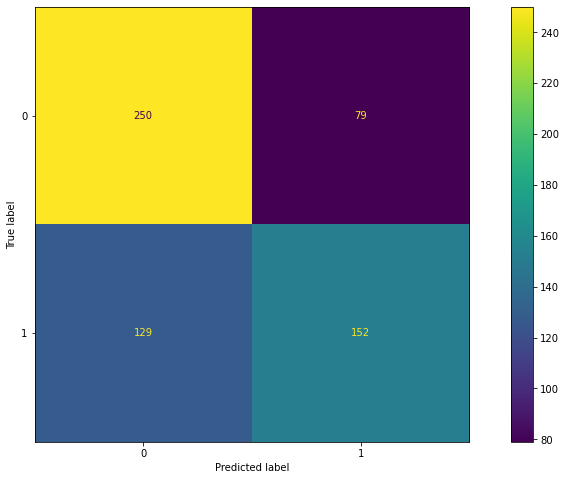

In [172]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

C:\Users\212548638\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.66      0.79      0.72       142
           1       0.67      0.52      0.58       120

    accuracy                           0.66       262
   macro avg       0.67      0.65      0.65       262
weighted avg       0.67      0.66      0.66       262
 



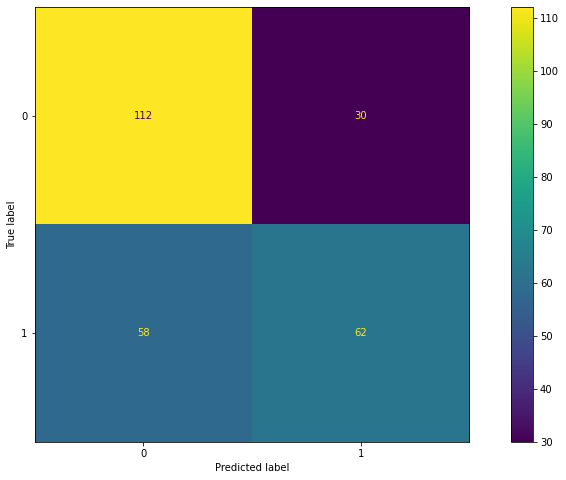

In [173]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

### AUC and ROC for the training data

AUC: 0.729


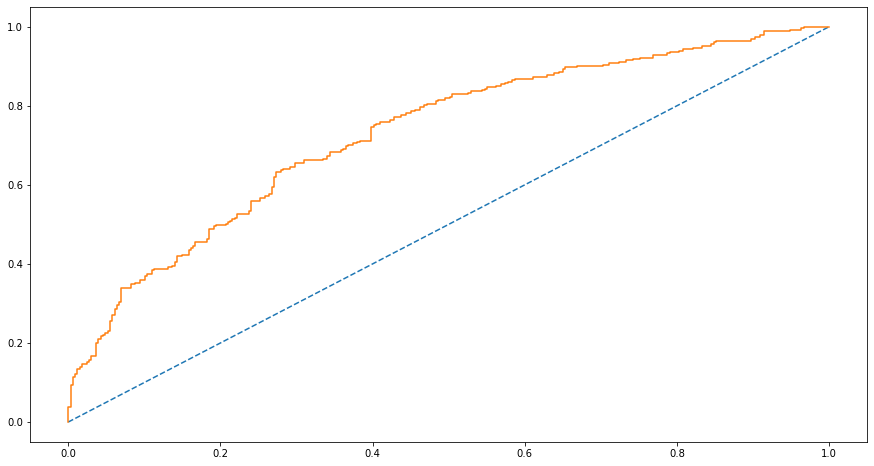

In [174]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.729


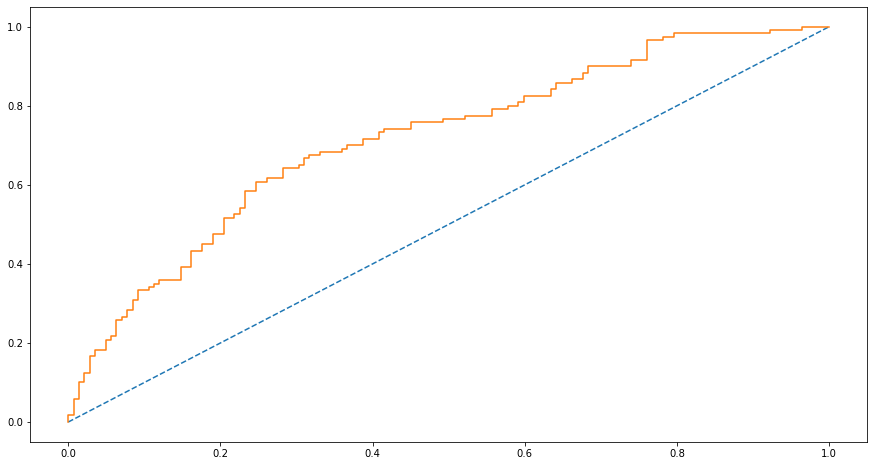

In [175]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

Note: Alternatively, one hot encoding can also be done instead of label encoding on categorical variables before building the logistic regression model. Do play around with these techniques using one hot encoding as well.

## Linear Discriminant Analysis

In [176]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

### Prediction

In [177]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

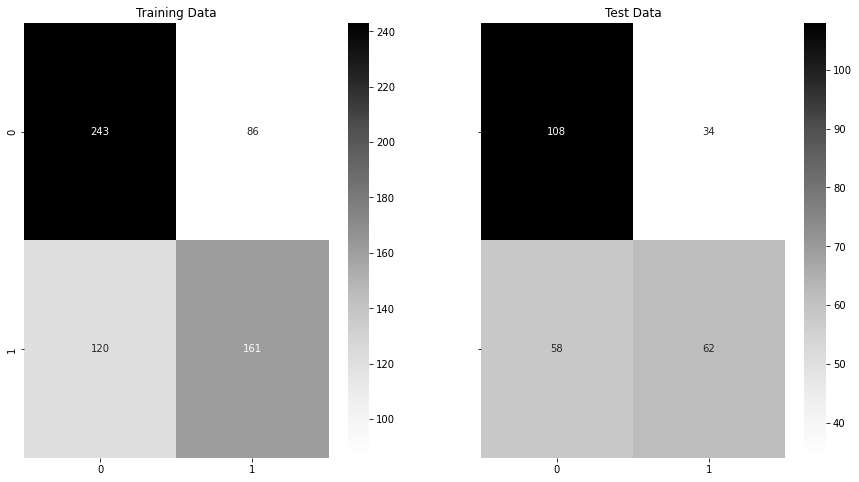

In [178]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Training Data and Test Data Classification Report Comparison

In [179]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



### Probability prediction for the training and test data

In [180]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [181]:
pred_prob_train[:,1]

array([0.73381047, 0.28335139, 0.39602227, 0.75811139, 0.47077503,
       0.40288832, 0.36938597, 0.30429271, 0.60511549, 0.64331779,
       0.23236876, 0.25905352, 0.35870658, 0.04481746, 0.28052157,
       0.36436459, 0.54805152, 0.30607846, 0.58596151, 0.66087477,
       0.62864901, 0.26524013, 0.88183311, 0.3339946 , 0.08650304,
       0.82610447, 0.19401889, 0.75721542, 0.53138081, 0.1884556 ,
       0.29545808, 0.33809258, 0.3786442 , 0.3805076 , 0.31248766,
       0.29335095, 0.10970912, 0.56057784, 0.48145587, 0.19510252,
       0.22664102, 0.79936112, 0.5017598 , 0.73936151, 0.7906696 ,
       0.36957611, 0.30401273, 0.93317999, 0.43207603, 0.72243241,
       0.71571829, 0.45361505, 0.78697249, 0.3732299 , 0.19256563,
       0.74061067, 0.25056989, 0.51469343, 0.67344556, 0.35368416,
       0.61007438, 0.52767641, 0.52194835, 0.41031873, 0.56904209,
       0.61659997, 0.1237378 , 0.56414678, 0.40272604, 0.27648254,
       0.33165029, 0.74716143, 0.77838017, 0.21902504, 0.44569

AUC for the Training Data: 0.731
AUC for the Test Data: 0.714


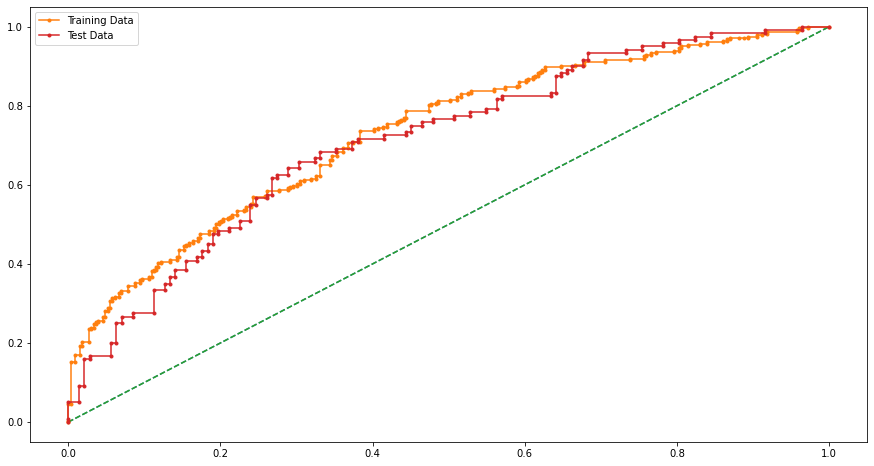

In [182]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## change the cut-off values for maximum accuracy

0.1 

Accuracy Score 0.4738
F1 Score 0.6356 

Confusion Matrix


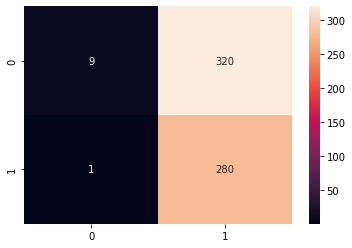

0.2 

Accuracy Score 0.523
F1 Score 0.6498 

Confusion Matrix


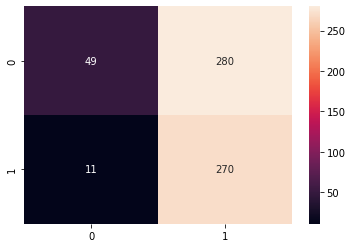

0.3 

Accuracy Score 0.6066
F1 Score 0.6774 

Confusion Matrix


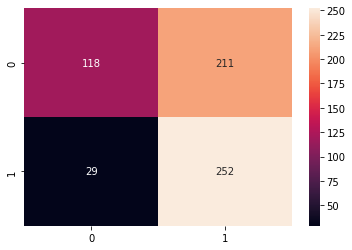

0.4 

Accuracy Score 0.6623
F1 Score 0.6677 

Confusion Matrix


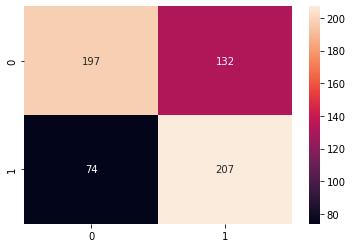

0.5 

Accuracy Score 0.6623
F1 Score 0.6098 

Confusion Matrix


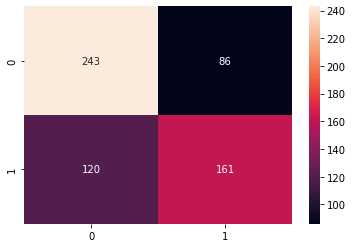

0.6 

Accuracy Score 0.6508
F1 Score 0.5192 

Confusion Matrix


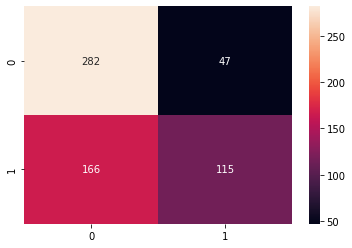

0.7 

Accuracy Score 0.6426
F1 Score 0.4263 

Confusion Matrix


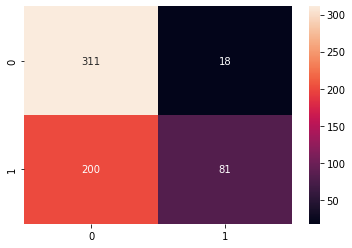

0.8 

Accuracy Score 0.5902
F1 Score 0.2038 

Confusion Matrix


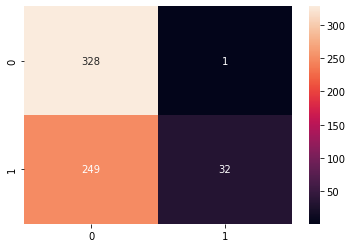

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


In [ ]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

0.4 cut-off gives us the best 'f1-score' and accuracy score.Let us evaluate the predictions of the test data using these cut-off values.

In [ ]:
#Predicting the classes on the test data


data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [ ]:
#Predicting the classes on the train data


data_pred_custom_cutoff1=[]
for i in range(0,len(pred_prob_train[:,1])):
    if np.array(pred_prob_train[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff1.append(a)

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_train,data_pred_custom_cutoff1)),annot=True,fmt='.5g',cmap='Greys');

In [ ]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

In [ ]:
print('Classification Report of the default cut-off train data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n\n\n')
print('Classification Report of the custom cut-off train data:\n\n',metrics.classification_report(y_train,data_pred_custom_cutoff1),'\n')

Form above we can see that for LDA, there is improvement in Recall and F score which means LDA perform better. 
 


2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

For the business problem of holiday package, two model were analysed i.e. Logistic Regression & Linear Discriminant Analysis for the predictions. These two models were evaluated on training and testing datasets and model performance were analysed.
The Accuracy, Precision and F1 score was computed using classification report. The confusion matrix, AUC_ROC score and ROC plot was computed and compared for different models.
Train and Test dataset have similar statistics, hence model is giving similar result for test and train data set.
With maximum accuracy of 65% and recall rate of 72% for test data model is only able to predict 72% of total tours which were actually claimed as claimed.
F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 values is low.
Both the models have similar results for Accuracy and precision while for LDA, there is improvement in Recall and F score which means overall LDA perform better. 
Based on LDA
For predicting Holiday package = yes (Label 1 ):
-	Precision (60%) – 60% of employees predicted are actually opting for holiday package of all employees predicted to opt for holiday package 
-	Recall (72%) – Out of all the employess actually opting for holiday package, 72% of employees have been predicted correctly 

For predicting Holiday package = no (Label 0 ):
-	Precision (71%) – 71% of employees predicted are actually opting for holiday package of all employees predicted to opt for holiday package .
-	Recall (59%) – Out of all the employess actually opting for holiday package, 59% of employees have been predicted correctly .</b>
Since we are building a model to predict if whether employee will opt for tour or not, for practical purposes, we will be more interested in correctly classifying 1 (employees opting for tour) than 0(employees not opting for tour).
Overall accuracy of the model – 65 % of total predictions are correct
Accuracy, AUC, Precision and Recall for test data is almost inline with training data. 
This proves no overfitting or underfitting has happened, and overall the model is a good model for classification

Recommendation & Insights: 
•	Employees over the age of 50 seems to be not taking holiday packages are compared to younger employees.
•	Employees with salary less than 50000 are opting for holiday package.
•	45% employees are taking holiday packages.
•	If employee is foreigner and employee not having young children, chances of opting for Holiday Package is good.
•	A survey to understand good destination for people above 50 years may help to attract them to take holiday packages
•	Targeting arents with younger children should be avoided as conversion rate seems to be less.



